In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime as dt
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Loading data
file_path = Path("../Decision Tree Model/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df_bitcoin = pd.read_csv(file_path)
df_bitcoin.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Drop NaNs from the Dataset. 
df_bitcoin.dropna(inplace=True)

# show the first 5 rows
df_bitcoin.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [4]:
# Convert Timestamp into TimeZone (ET)
#df_bitcoin['Timestamp'] = (pd.to_datetime(df_bitcoin['Timestamp'], unit='s')
#                     .dt.tz_localize('est')
#                     .dt.tz_convert('America/New_York'))
#df_bitcoin.head()

In [5]:
#df_bitcoin["Date"] = pd.to_datetime(df_bitcoin["Timestamp"]).dt.date

In [6]:
#df_bitcoin.head()

In [7]:
# Define features set
X = df_bitcoin.drop(["Weighted_Price"], axis = 1)
X = X.drop(["Open", "High", "Low", "Close", "Volume_(BTC)", "Volume_(Currency)"], axis=1)
X.head()

,Timestamp
0,1325317920
478,1325346600
547,1325350740
548,1325350800
1224,1325391360


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 1 columns):
 #   Column     Dtype
---  ------     -----
 0   Timestamp  int64
dtypes: int64(1)
memory usage: 55.1 MB


In [9]:
X.shape

(3613769, 1)

In [10]:
# Define target vector
y = df_bitcoin["Weighted_Price"].values.reshape(-1, 1)
y[:5]

array([[4.39     ],
       [4.39     ],
       [4.5264115],
       [4.58     ],
       [4.58     ]])

In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Determine the shape of our training and testing sets.
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [13]:
# Splitting into Train and Test sets into an 80/20 split.
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

In [14]:
# Determine the shape of our training and testing sets.
#print(X_train2.shape)
#print(X_test2.shape)
#print(y_train2.shape)
#print(y_test2.shape)

In [15]:
# Creating StandardScaler instance
#scaler = StandardScaler()

In [16]:
# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [17]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Creating the descion tree regression
regressor = DecisionTreeRegressor()

In [19]:
# Fitting the model
regressor.fit(X, y)

DecisionTreeRegressor()

In [20]:
# Making predictions using the testing data
y_pred = regressor.predict(X)
y_pred

array([4.39000000e+00, 4.39000000e+00, 4.55320575e+00, ...,
       5.86947125e+04, 5.87631078e+04, 5.87631078e+04])

In [21]:
print(len(y_pred))

3613769


In [22]:
y_pred.shape

(3613769,)

<function matplotlib.pyplot.show(close=None, block=None)>

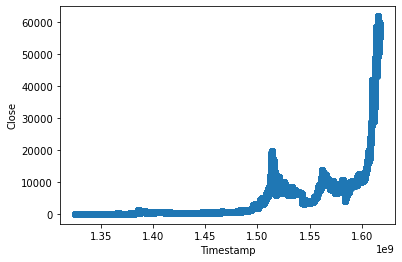

In [23]:
# Visualizing the Decision Tree Regression Results
plt.scatter(X, y_pred)
plt.plot(X, regressor.predict(X))
plt.title("")
plt.xlabel("Timestamp")
plt.ylabel("Close")
plt.show